In [58]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
hr = pd.read_csv("D:/Jobin/DataTrained/Evaluation Projects/HR Analytics Project/WA_Fn-UseC_-HR-Employee-Attrition.csv")
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
hr.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [4]:
hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
hr.EmployeeCount.unique()

array([1], dtype=int64)

Employee count seems to be 1 for all rows. Hence droping it

In [6]:
hr.drop(["EmployeeCount"], axis =1, inplace = True)
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,4,80,0,17,3,2,9,6,0,8


I assume that employee number is something like an employee ID. Hence dropping it since it doesn't have anything to do with attrition

In [7]:
hr.drop(["EmployeeNumber"], axis =1, inplace = True)
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,4,80,0,17,3,2,9,6,0,8


In [8]:
hr.Over18.unique()

array(['Y'], dtype=object)

In [9]:
#Over18 row has only Y in it. Hence I am dropping it
hr.drop(["Over18"], axis =1, inplace = True)
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,4,80,0,17,3,2,9,6,0,8


In [10]:
hr.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [11]:
hr.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [15]:
l = LabelEncoder()
hr['Attrition'] = l.fit_transform(hr['Attrition'])
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,4,80,0,17,3,2,9,6,0,8


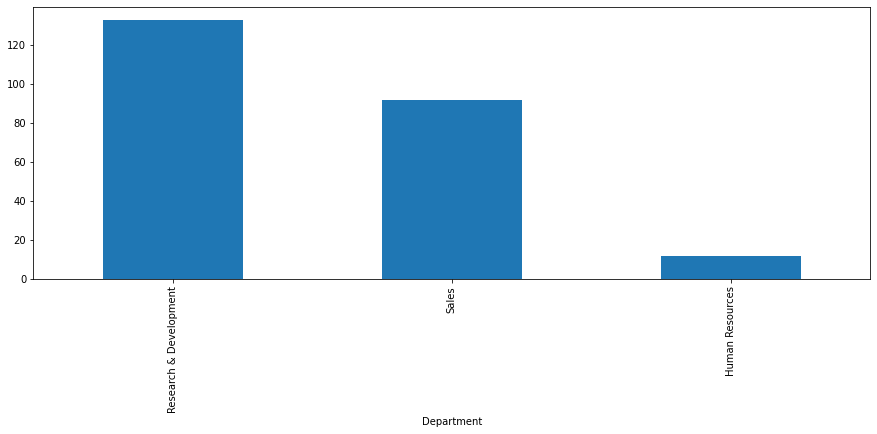

In [16]:
hr.groupby("Department")["Attrition"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))

R&D has most attrition and HR has the least

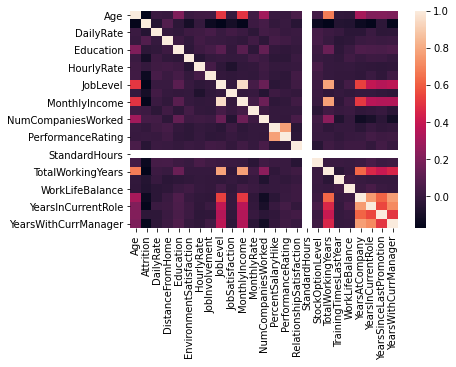

In [17]:
sns.heatmap(hr.corr())

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

There are too many columns. Let's select the best features from it. FOr that, first let's convert all columns into numerics

In [32]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,4,80,1,6,3,3,2,2,2,2


In [40]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int32 
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   int64 
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [41]:
hr['BusinessTravel'] = l.fit_transform(hr['BusinessTravel'])
hr['Department'] = l.fit_transform(hr['Department'])
hr['EducationField'] = l.fit_transform(hr['EducationField'])
hr['Gender'] = l.fit_transform(hr['Gender'])
hr['JobRole'] = l.fit_transform(hr['JobRole'])
hr['MaritalStatus'] = l.fit_transform(hr['MaritalStatus'])
hr['OverTime'] = l.fit_transform(hr['OverTime'])
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,4,80,0,17,3,2,9,6,0,8


In [43]:
X = hr.drop('Attrition', axis = 1)
Y = hr['Attrition']
Y = Y.values.reshape(-1,1)
Y.shape

(1470, 1)

In [44]:
bestfeatures = SelectKBest(score_func = chi2, k = 10)
fit = bestfeatures.fit(X,Y)

In [46]:
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)

In [47]:
featureScores = pd.concat([columns, scores], axis = 1)
featureScores.columns = ['features', 'Score']
featureScores

,features,Score
0,Age,84.155277
1,BusinessTravel,0.000002
2,DailyRate,956.580494
3,Department,1.329297
4,DistanceFromHome,63.772142
5,Education,0.520642
6,EducationField,0.834912
7,EnvironmentSatisfaction,6.890594
8,Gender,0.510087
9,HourlyRate,0.431779


We can see that Monthly income is the feature that is hugely correlated to attrition. Let's list best 10

In [48]:
print(featureScores.nlargest(10, 'Score'))

                features          Score
15         MonthlyIncome  127922.293694
16           MonthlyRate    1196.633553
2              DailyRate     956.580494
24     TotalWorkingYears     230.721618
27        YearsAtCompany     142.100054
28    YearsInCurrentRole     117.522596
30  YearsWithCurrManager     110.671534
0                    Age      84.155277
18              OverTime      63.845067
4       DistanceFromHome      63.772142


In [50]:
X = hr[['MonthlyIncome', 'MonthlyRate', 'DailyRate', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 'Age', 'OverTime', 'DistanceFromHome']]
X

,MonthlyIncome,MonthlyRate,DailyRate,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Age,OverTime,DistanceFromHome
0,5993,19479,1102,8,6,4,5,41,1,1
1,5130,24907,279,10,10,7,7,49,0,8
2,2090,2396,1373,7,0,0,0,37,1,2
3,2909,23159,1392,8,8,7,0,33,1,3
4,3468,16632,591,6,2,2,2,27,0,2
...,...,...,...,...,...,...,...,...,...,...
1465,2571,12290,884,17,5,2,3,36,0,23
1466,9991,21457,613,9,7,7,7,39,0,6
1467,6142,5174,155,6,6,2,3,27,1,4
1468,5390,13243,1023,17,9,6,8,49,0,2


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [54]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X

,0,1,2,3,4,5,6,7,8,9
0,-0.108350,0.726020,0.742527,-0.421642,-0.164613,-0.063296,0.245834,0.446350,1.591746,-1.010909
1,-0.291719,1.488876,-1.297775,-0.164511,0.488508,0.764998,0.806541,1.322365,-0.628241,-0.147150
2,-0.937654,-1.674841,1.414363,-0.550208,-1.144294,-1.167687,-1.155935,0.008343,1.591746,-0.887515
3,-0.763634,1.243211,1.461466,-0.421642,0.161947,0.764998,-1.155935,-0.429664,1.591746,-0.764121
4,-0.644858,0.325900,-0.524295,-0.678774,-0.817734,-0.615492,-0.595227,-1.086676,-0.628241,-0.887515
...,...,...,...,...,...,...,...,...,...,...
1465,-0.835451,-0.284329,0.202082,0.735447,-0.327893,-0.615492,-0.314873,-0.101159,-0.628241,1.703764
1466,0.741140,1.004010,-0.469754,-0.293077,-0.001333,0.764998,0.806541,0.227347,-0.628241,-0.393938
1467,-0.076690,-1.284418,-1.605183,-0.678774,-0.164613,-0.615492,-0.314873,-1.086676,1.591746,-0.640727
1468,-0.236474,-0.150393,0.546677,0.735447,0.325228,0.488900,1.086895,1.322365,-0.628241,-0.887515


In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [63]:
Y_train.shape

(1176, 1)

In [64]:
Y_test.shape

(294, 1)

# DecisionTree

In [66]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
dtc.score(X_train, Y_train)
preddtc = dtc.predict(X_test)
print(accuracy_score(Y_test, preddtc))
print(confusion_matrix(Y_test, preddtc))
print(classification_report(Y_test, preddtc))

0.782312925170068
[[224  31]
 [ 33   6]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       255
           1       0.16      0.15      0.16        39

    accuracy                           0.78       294
   macro avg       0.52      0.52      0.52       294
weighted avg       0.78      0.78      0.78       294



In [67]:
print('Mean absolute error:', mean_absolute_error(Y_test, preddtc))
print('Mean squared error:', mean_squared_error(Y_test, preddtc))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, preddtc)))
print('R2 score is:', r2_score(Y_test, preddtc))

Mean absolute error: 0.21768707482993196
Mean squared error: 0.21768707482993196
Root Mean squared error: 0.46656947481584343
R2 score is: -0.8920060331825039


# KNeighbors

In [68]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn.score(X_train, Y_train)
predknn = knn.predict(X_test)
print(accuracy_score(Y_test, predknn))
print(confusion_matrix(Y_test, predknn))
print(classification_report(Y_test, predknn))

0.8503401360544217
[[245  10]
 [ 34   5]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       255
           1       0.33      0.13      0.19        39

    accuracy                           0.85       294
   macro avg       0.61      0.54      0.55       294
weighted avg       0.81      0.85      0.82       294



In [69]:
print('Mean absolute error:', mean_absolute_error(Y_test, predknn))
print('Mean squared error:', mean_squared_error(Y_test, predknn))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, predknn)))
print('R2 score is:', r2_score(Y_test, predknn))

Mean absolute error: 0.14965986394557823
Mean squared error: 0.14965986394557823
Root Mean squared error: 0.3868589716493314
R2 score is: -0.3007541478129714


# SVC

In [70]:
svck = SVC(kernel = 'poly')
svck.fit(X_train, Y_train)
svck.score(X_train, Y_train)
predsvck = svck.predict(X_test)
print(accuracy_score(Y_test, predsvck))
print(confusion_matrix(Y_test, predsvck))
print(classification_report(Y_test, predsvck)) 

0.8707482993197279
[[254   1]
 [ 37   2]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.67      0.05      0.10        39

    accuracy                           0.87       294
   macro avg       0.77      0.52      0.51       294
weighted avg       0.85      0.87      0.82       294



In [71]:
print('Mean absolute error:', mean_absolute_error(Y_test, predsvck))
print('Mean squared error:', mean_squared_error(Y_test, predsvck))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, predsvck)))
print('R2 score is:', r2_score(Y_test, predsvck))

Mean absolute error: 0.1292517006802721
Mean squared error: 0.1292517006802721
Root Mean squared error: 0.35951592548908334
R2 score is: -0.12337858220211162


In [72]:
svcr = SVC(kernel = 'rbf')
svcr.fit(X_train, Y_train)
svcr.score(X_train, Y_train)
predsvcr = svcr.predict(X_test)
print(accuracy_score(Y_test, predsvcr))
print(confusion_matrix(Y_test, predsvcr))
print(classification_report(Y_test, predsvcr)) 

0.8707482993197279
[[254   1]
 [ 37   2]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.67      0.05      0.10        39

    accuracy                           0.87       294
   macro avg       0.77      0.52      0.51       294
weighted avg       0.85      0.87      0.82       294



In [73]:
print('Mean absolute error:', mean_absolute_error(Y_test, predsvcr))
print('Mean squared error:', mean_squared_error(Y_test, predsvcr))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, predsvcr)))
print('R2 score is:', r2_score(Y_test, predsvcr))

Mean absolute error: 0.1292517006802721
Mean squared error: 0.1292517006802721
Root Mean squared error: 0.35951592548908334
R2 score is: -0.12337858220211162


# LogisticRegression

In [75]:
LgR = LogisticRegression()
LgR.fit(X_train, Y_train)

LogisticRegression()

In [76]:
predictions = LgR.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [77]:
from sklearn.metrics import confusion_matrix, classification_report

In [78]:
accuracy = accuracy_score(Y_test, predictions)
accuracy

0.8741496598639455

LogisticRegression gives better performance

In [79]:
import pickle
filename = 'hr_LgR.pkl'
pickle.dump(LgR, open(filename, 'wb'))